In [666]:
import pandas as pd
import yfinance as yf

ypairs_dict = {
  "BTC": "BTC-USD",
  "ETH": "ETH-USD",
  "ADA": "ADA-USD",
  "SOL": "SOL-USD" ,
  "AVAX": "AVAX-USD",
   "BNB": "BNB-USD", 
   "LUNA": "LUNA1-USD"
}
for value in ypairs_dict.values():
 
  df = yf.download(value, start='2020-07-13',
                          end='2022-01-10',
                          interval = '1d'
    )
  df.to_csv(f"{value}.csv")
   


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


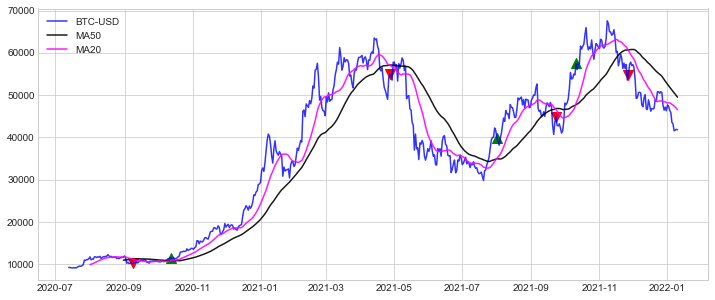

On 2020-10-13 Bought $1000 in Crypto for 0.08752046239521796 BTC-USD
On  2021-04-27 sold 0.1BTC-USD for 5503
On  2021-08-01 Bought $5503 in Crypto for 0.137661401350242 BTC-USD
On  2021-09-23 sold 0.1BTC-USD for 4490
On  2021-10-11 Bought $4490 in Crypto for 0.07810761895843914 BTC-USD
On  2021-11-27 sold 0.1BTC-USD for 5482
Ended in USD for a total of $5482
If just HODL would do 4524.3
**********************************************************************


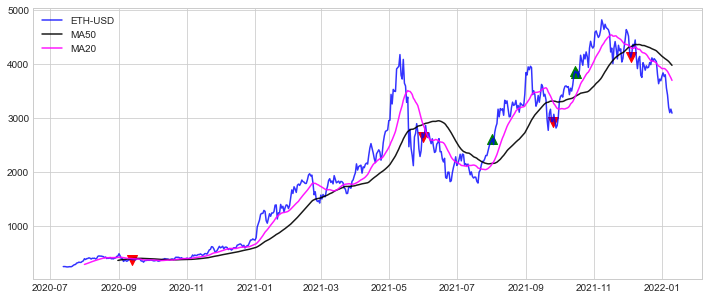

On  2021-08-02 Bought $1000 in Crypto for 0.3831192567187108 ETH-USD
On  2021-09-25 sold 0.4ETH-USD for 1170
On  2021-10-15 Bought $1170 in Crypto for 0.30290205287133487 ETH-USD
On  2021-12-04 sold 0.3ETH-USD for 1236
Ended in USD for a total of $1236
If just HODL would do 12867.4
**********************************************************************


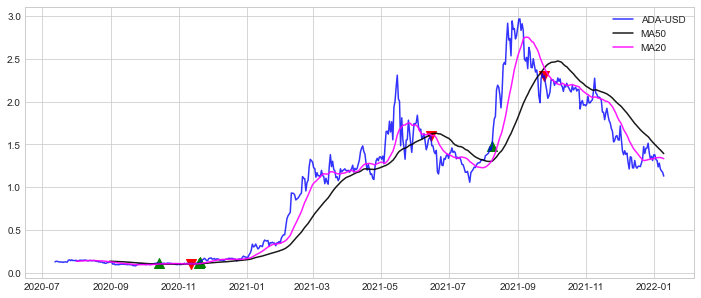

On 2020-10-14 Bought $1000 in Crypto for 9319.924783836857 ADA-USD
On  2020-11-12 sold 9319.9ADA-USD for 974
On  2020-11-19 Bought $974 in Crypto for 9200.309820738748 ADA-USD
On  2021-06-15 sold 9200.3ADA-USD for 14700
On  2021-08-09 Bought $14700 in Crypto for 9948.295710735878 ADA-USD
On  2021-09-25 sold 9948.3ADA-USD for 22896
Ended in USD for a total of $22896
If just HODL would do 9085.8
**********************************************************************


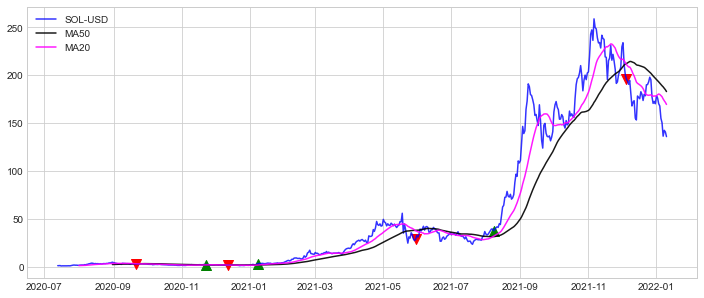

On  2020-11-23 Bought $1000 in Crypto for 439.2945528805171 SOL-USD
On  2020-12-13 sold 439.3SOL-USD for 688
On  2021-01-09 Bought $688 in Crypto for 203.22670020629863 SOL-USD
On  2021-05-30 sold 203.2SOL-USD for 5812
On  2021-08-08 Bought $5812 in Crypto for 154.2715693561957 SOL-USD
On  2021-12-05 sold 154.3SOL-USD for 30269
Ended in USD for a total of $30269
If just HODL would do 115634.1
**********************************************************************


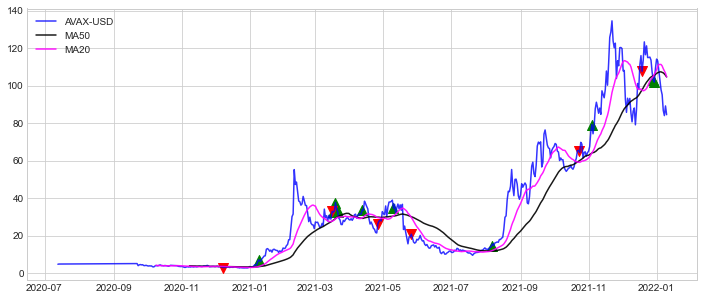

On  2021-01-09 Bought $1000 in Crypto for 138.53233874719695 AVAX-USD
On  2021-03-16 sold 138.5AVAX-USD for 4582
On  2021-03-17 Bought $4582 in Crypto for 140.35483999126893 AVAX-USD
On  2021-04-26 sold 140.4AVAX-USD for 3715
On  2021-05-10 Bought $3715 in Crypto for 107.05592644963544 AVAX-USD
On  2021-05-26 sold 107.1AVAX-USD for 2239
On  2021-08-06 Bought $2239 in Crypto for 152.04987431296985 AVAX-USD
On  2021-10-23 sold 152.0AVAX-USD for 9950
On  2021-11-04 Bought $9950 in Crypto for 125.4836155568669 AVAX-USD
On  2021-12-19 sold 125.5AVAX-USD for 13513
On  2021-12-29 Bought $13513 in Crypto for 131.19656537658415 AVAX-USD
Ended in with 131.2 in crypto for a total of $11090.7
If just HODL would do 17264.6
**********************************************************************


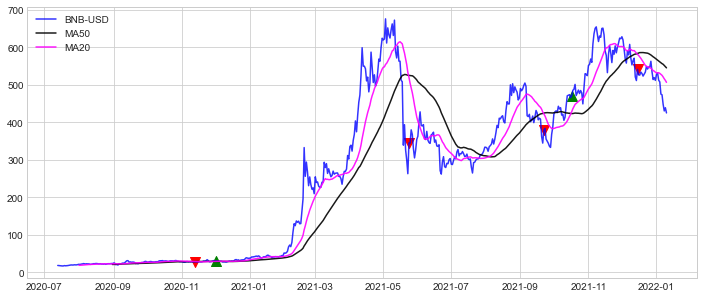

On  2020-12-02 Bought $1000 in Crypto for 33.00617461893615 BNB-USD
On  2021-05-24 sold 33.0BNB-USD for 11395
On  2021-10-17 Bought $11395 in Crypto for 24.212455138807236 BNB-USD
On  2021-12-15 sold 24.2BNB-USD for 13093
Ended in USD for a total of $13093
If just HODL would do 23082.2
**********************************************************************


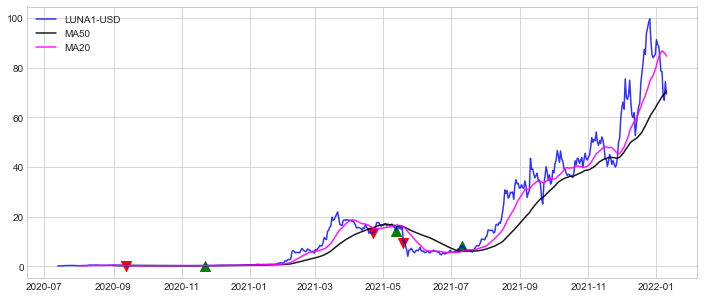

On  2020-11-22 Bought $1000 in Crypto for 2873.736557956424 LUNA1-USD
On  2021-04-22 sold 2873.7LUNA1-USD for 39226
On  2021-05-12 Bought $39226 in Crypto for 2709.88107880187 LUNA1-USD
On  2021-05-19 sold 2709.9LUNA1-USD for 26134
On  2021-07-11 Bought $26134 in Crypto for 3102.9668045159865 LUNA1-USD
Ended in with 3103.0 in crypto for a total of $215507.1
If just HODL would do 328014.7
**********************************************************************


In [680]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import matplotlib.ticker as ticker
import matplotlib.dates as mdate
from matplotlib import pyplot as plt

if os.path.exists("hodlvsMA.csv"):
      os.remove("hodlvsMA.csv")

for value in ypairs_dict.items():
    pair = value[1]
    df = pd.read_csv(f"/Users/nicolasmartinez/{pair}.csv")
    df[["MA_50"]] = df[["Adj Close"]].rolling(window=50).mean()
    df[["MA_20"]] = df[["Adj Close"]].rolling(window=20).mean()
    df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
    df_MA = df[['Date','Adj Close', 'MA_50',"MA_20"]]
    df_MA.dropna()
    last_price = df_MA['Adj Close'].tail(1).values.item()
    init_bal_in_crypto = 1000/df_MA['Adj Close'].head(1).values.item()
    buy_list=[]
    sell_list=[]

    for i in range(len(df_MA)):
        if df_MA.MA_20.iloc[i] > df_MA.MA_50.iloc[i-1] \
        and df_MA.MA_20.iloc[i-1]< df_MA.MA_50.iloc[i-1]:
            buy_list.append(i)
        elif df_MA.MA_20.iloc[i]< df_MA.MA_50.iloc[i] \
            and df_MA.MA_20.iloc[i-1]> df_MA.MA_50.iloc[i-1]:
            sell_list.append(i)
    x = df_MA.Date
    plt.figure(figsize=(12,5))
    plt.plot(x, df_MA["Adj Close"], label = pair, c ='blue', alpha=0.8)
    plt.plot(x, df_MA["MA_50"], label = "MA50", c ='k', alpha=0.9)
    plt.plot(x, df_MA["MA_20"], label = "MA20", c ='magenta', alpha=0.9)
    plt.scatter(df_MA.iloc[buy_list]["Date"], df_MA.iloc[buy_list]["Adj Close"],marker ="^", color = "g", s=100)
    plt.scatter(df_MA.iloc[sell_list]["Date"], df_MA.iloc[sell_list]["Adj Close"],marker ="v", color = "r", s=100)
    plt.legend()
    plt.savefig(f"{pair}.png")
    plt.show()
    
    
    sb_list = buy_list + sell_list
    sb_list.sort()

    list_buy_sell = []
    for x in sb_list:
        if x in buy_list:
            list_buy_sell.append(str(x)+'b')
        else:
            list_buy_sell.append(str(x)+'s')
    import os
    bal_USD = 1000
    

    list_start_sc = [bal_USD]#
    buy_sell_list = []# list where to add buying selling info
    buy_sell_df = pd.DataFrame(columns=['crypto', 'started_in', 'trading_or_HODL','ending_bal'])
    started_in=""
    balance_in_crypto = 1000/df_MA['Adj Close'].head(1).values.item()
    
    for start in list_start_sc:
        balance_in_crypto = 1000/df_MA['Adj Close'].head(1).values.item()
        #print(f"start: {start}") 

        if start != 1000:
            bal_USD = 0
            
        for i in range(len(list_buy_sell)):#-1
            location = int(list_buy_sell[i][0:len(list_buy_sell[i])-1])
            date_transaction =  df_MA.iloc[[location]]["Date"].to_string()
            date_transaction = date_transaction[5:19]
            price = round(df_MA.iloc[[location]]["Adj Close"].values.item(),1)
           
            if list_buy_sell[i][-1] == 's' and i == 0 and start == 1000:
                pass 
            else:
                if str(list_buy_sell[i][-1]) == 'b' and round(bal_USD,2) > 0 :
                    balance_in_crypto = bal_USD /df_MA.iloc[[location]]["Adj Close"]
                    print(f"On {date_transaction} Bought ${bal_USD} in Crypto for {balance_in_crypto.values.item()} {pair}")
                    bal_USD = 0
                    balance_in_crypto = round(balance_in_crypto.values.item(),1)
                    
               
                elif str(list_buy_sell[i][-1]) == 's' and int(bal_USD) == 0 :
                    bal_USD = round(balance_in_crypto *df_MA.iloc[[location]]["Adj Close"].values.item())
                    print(f"On {date_transaction} sold {balance_in_crypto}{pair} for {bal_USD}")
                    balance_in_crypto = 0

        if balance_in_crypto > 0:
            bal_USD = round((balance_in_crypto * last_price),1)
            print(f"Ended in with {balance_in_crypto} in crypto for a total of ${bal_USD}")
        else:
            print(f"Ended in USD for a total of ${bal_USD}")  

        if start == 1000:
            started_in = "Cash"
        else:
            started_in = "Crypto"

        df_length = len(buy_sell_df)
        df2 = {'crypto': pair,'started_in':started_in, \
                   'trading_or_HODL': 'tradingMA','ending_bal': bal_USD}
        buy_sell_df = buy_sell_df.append(df2, ignore_index = True) 

        #if our investor would just hodl
        #init_crypto = 1000/df_MA['Adj Close'].head(1).values.item()
        crypto_hodl_last_day = round((init_bal_in_crypto *  last_price),1)
        print(f"If just HODL would do {crypto_hodl_last_day}")


        print("*"*70)

    df2 = {'crypto': pair,'started_in': 'Crypto',\
                   'trading_or_HODL': 'HODL','ending_bal':  crypto_hodl_last_day}
    buy_sell_df = buy_sell_df.append(df2, ignore_index = True) 
    
    hdr = False  if os.path.isfile('hodlvsMA.csv') else True
    buy_sell_df.to_csv('hodlvsMA.csv', mode='a', header=hdr, index = False)
#print(buy_sell_df)

In [673]:
df1 = pd.read_csv(f"/Users/nicolasmartinez/Luna1-USD.csv")
balance_in_crypto = 1000/df1['Adj Close'].head(1).values.item()
last_price =df1['Adj Close'].tail(1).values.item()
print(last_price)
print(balance_in_crypto)
print(last_price*balance_in_crypto)

69.45121765136719
4722.951653356646
328014.7432341569
